  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
[1,  2000] loss: 2.092
[1,  4000] loss: 2.042
[1,  6000] loss: 2.036
[1,  8000] loss: 2.048
[1, 10000] loss: 2.021
[1, 12000] loss: 2.015
[2,  2000] loss: 1.968
[2,  4000] loss: 1.969
[2,  6000] loss: 1.986
[2,  8000] loss: 1.992
[2, 10000] loss: 1.980
[2, 12000] loss: 1.978
Finished Training
Accuracy of the network on the 10000 test images: 35 %
Accuracy of plane : 61 %
Accuracy of   car : 47 %
Accuracy of  bird : 22 %
Accuracy of   cat :  9 %
Accuracy of  deer :  6 %
Accuracy of   dog : 36 %
Accuracy of  frog : 58 %
Accuracy of horse : 39 %
Accuracy of  ship : 42 %
Accuracy of truck : 33 %


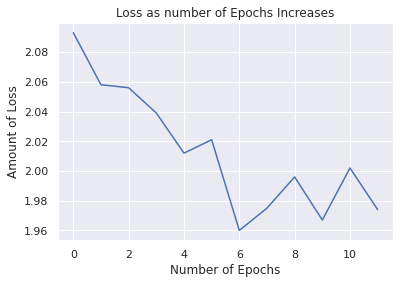

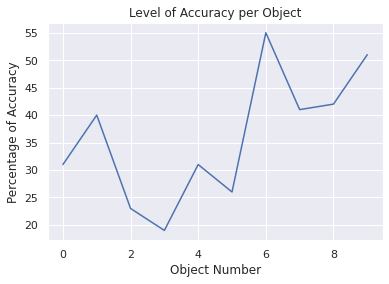

In [1]:
import argparse
import os
import random
import shutil
import time
import warnings
from enum import Enum
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.distributed as dist
import torch.optim
from torch.optim.lr_scheduler import StepLR
import torch.multiprocessing as mp
import torch.utils.data
import torch.utils.data.distributed
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from __future__ import print_function
import torchvision
from torchvision import datasets, transforms
import torch.nn.functional as F
import torchvision.transforms as T
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import seaborn as sns
sns.set()

#ECS 174 HW 3 by, Jeffrey Ugochukwu
#Question 2 Run Tutorial Code to have a single fully connected layer
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #self.conv1 = nn.Conv2d(3, 6, 5)
        #self.pool = nn.MaxPool2d(2, 2)
        #self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(32*32*3,10)
        #self.fc2 = nn.Linear(120, 84)
        #self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        #x = self.pool(F.relu(self.conv1(x)))
        #x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32*32*3)
        x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        #x = self.fc3(x)
        return x


net = Net()
##Loss Calculation
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
        #plt.plot(running_loss)
        #plt.show()

print('Finished Training')
##Accuracy per 10000 test images
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    #plt.plot(100 * correct / total)
    #plt.show()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

##Accuracy per class calculation
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

##Plot for loss    
loss_lst = [2.093, 2.058, 2.056, 2.039, 2.012, 2.021, 1.960, 1.975, 1.996, 1.967, 2.002, 1.974]
plt.plot(loss_lst)
plt.xlabel('Number of Epochs')
plt.ylabel('Amount of Loss')
plt.title('Loss as number of Epochs Increases')
plt.show()

##Plot for Class Accuracy
class_accuracy = [31, 40, 23, 19, 31, 26, 55, 41, 42, 51]
plt.plot(class_accuracy)
plt.xlabel("Object Number")
plt.ylabel("Percentage of Accuracy")
plt.title("Level of Accuracy per Object")
plt.show()

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 1.920
[1,  4000] loss: 1.730
[1,  6000] loss: 1.655
[1,  8000] loss: 1.611
[1, 10000] loss: 1.595
[1, 12000] loss: 1.550
[2,  2000] loss: 1.487
[2,  4000] loss: 1.485
[2,  6000] loss: 1.474
[2,  8000] loss: 1.448
[2, 10000] loss: 1.455
[2, 12000] loss: 1.472
Finished Training
Accuracy of the network on the 10000 test images: 49 %
Accuracy of plane : 50 %
Accuracy of   car : 59 %
Accuracy of  bird : 48 %
Accuracy of   cat : 30 %
Accuracy of  deer : 24 %
Accuracy of   dog : 37 %
Accuracy of  frog : 64 %
Accuracy of horse : 57 %
Accuracy of  ship : 64 %
Accuracy of truck : 53 %


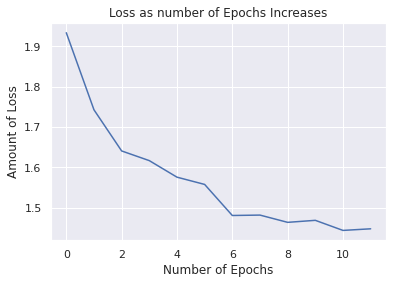

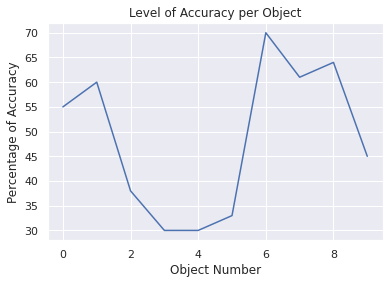

In [2]:
#Question 3 Run tutorial code to have multiple connected layers
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #self.conv1 = nn.Conv2d(3, 6, 5)
        #self.pool = nn.MaxPool2d(2, 2)
        #self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(32*32*3,140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        #x = self.pool(F.relu(self.conv1(x)))
        #x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32*32*3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
##Loss Calucation
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
##Accuracy of 10000 test images
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    #plt.plot(100 * correct / total)
    #plt.show()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

##Accuracy by Class
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
##Plot for Loss
loss_lst2 = [1.934, 1.743, 1.641, 1.617, 1.576, 1.558, 1.481, 1.482, 1.464, 1.469, 1.444, 1.448]
plt.plot(loss_lst2)
plt.xlabel('Number of Epochs')
plt.ylabel('Amount of Loss')
plt.title('Loss as number of Epochs Increases')
plt.show()

##Plot for Class Accuracy
class_accuracy2 = [55, 60, 38, 30, 30, 33, 70, 61, 64, 45]
plt.plot(class_accuracy2)
plt.xlabel("Object Number")
plt.ylabel("Percentage of Accuracy")
plt.title("Level of Accuracy per Object")
plt.show()

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.183
[1,  4000] loss: 1.835
[1,  6000] loss: 1.696
[1,  8000] loss: 1.575
[1, 10000] loss: 1.534
[1, 12000] loss: 1.492
[2,  2000] loss: 1.416
[2,  4000] loss: 1.394
[2,  6000] loss: 1.377
[2,  8000] loss: 1.361
[2, 10000] loss: 1.319
[2, 12000] loss: 1.283
Finished Training
Accuracy of the network on the 10000 test images: 53 %
Accuracy of plane : 36 %
Accuracy of   car : 68 %
Accuracy of  bird : 23 %
Accuracy of   cat : 14 %
Accuracy of  deer : 45 %
Accuracy of   dog : 59 %
Accuracy of  frog : 66 %
Accuracy of horse : 67 %
Accuracy of  ship : 76 %
Accuracy of truck : 74 %


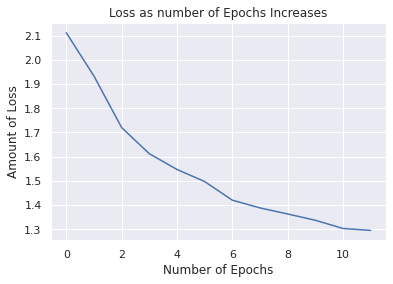

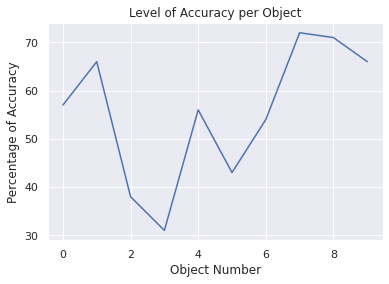

In [3]:
#Question 4 Add two connected layers with maxpooling layers
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
##Loss Calculation
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
##Accuracy of 10000 images
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    #plt.plot(100 * correct / total)
    #plt.show()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

##Class Accuracy
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
##Plot for Loss    
loss_lst3 = [2.112, 1.933, 1.720, 1.612, 1.547, 1.497, 1.420, 1.388, 1.363, 1.337, 1.303, 1.295]
plt.plot(loss_lst3)
plt.xlabel('Number of Epochs')
plt.ylabel('Amount of Loss')
plt.title('Loss as number of Epochs Increases')
plt.show()

##Plot for Class Accuracy
class_accuracy3 = [57, 66, 38, 31, 56, 43, 54, 72, 71, 66]
plt.plot(class_accuracy3)
plt.xlabel("Object Number")
plt.ylabel("Percentage of Accuracy")
plt.title("Level of Accuracy per Object")
plt.show()

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.255
[1,  4000] loss: 2.050
[1,  6000] loss: 1.938
[1,  8000] loss: 1.864
[1, 10000] loss: 1.754
[1, 12000] loss: 1.726
[1, 14000] loss: 1.721
[1, 16000] loss: 1.687
[1, 18000] loss: 1.629
[1, 20000] loss: 1.588
[1, 22000] loss: 1.605
[1, 24000] loss: 1.612
[1, 26000] loss: 1.547
[1, 28000] loss: 1.572
[1, 30000] loss: 1.594
[1, 32000] loss: 1.559
[1, 34000] loss: 1.527
[1, 36000] loss: 1.516
[1, 38000] loss: 1.533
[1, 40000] loss: 1.531
[1, 42000] loss: 1.521
[1, 44000] loss: 1.535
[1, 46000] loss: 1.553
[1, 48000] loss: 1.541
[1, 50000] loss: 1.488
[2,  2000] loss: 1.474
[2,  4000] loss: 1.453
[2,  6000] loss: 1.471
[2,  8000] loss: 1.492
[2, 10000] loss: 1.437
[2, 12000] loss: 1.491
[2, 14000] loss: 1.484
[2, 16000] loss: 1.446
[2, 18000] loss: 1.494
[2, 20000] loss: 1.464
[2, 22000] loss: 1.430
[2, 24000] loss: 1.494
[2, 26000] loss: 1.480
[2, 28000] loss: 1.498
[2, 30000] loss: 1.496
[2, 

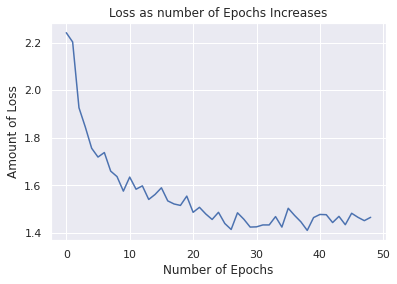

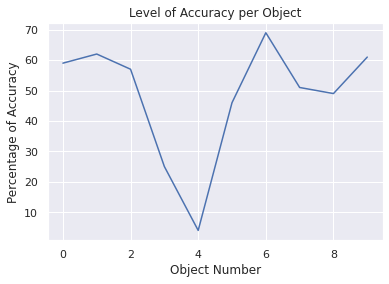

In [4]:
#5 Use batch sizes of 1, 4, and 1000 (or highest number computer can handle)
##Batch Size 1
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
##Loss Calculation
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
##Class Accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    #plt.plot(100 * correct / total)
    #plt.show()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

##Class Accuracy
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        label = labels[0]
        class_correct[label] += c.item()
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
#Plot for Loss
loss_lst4 = [2.241, 2.2023, 1.926, 1.845, 1.756, 1.719, 1.738, 1.66, 1.637, 1.576, 1.635, 1.584, 1.598, 1.541, 1.562, 1.59, 1.535, 1.522, 1.516, 1.555, 1.487, 1.508, 1.48, 1.457, 1.487, 1.44, 1.415, 1.485, 1.458, 1.425, 1.426, 1.434, 1.434, 1.469, 1.425, 1.504, 1.474, 1.447, 1.411, 1.465, 1.478, 1.477, 1.444, 1.47, 1.435, 1.483, 1.466, 1.452, 1.466]
plt.plot(loss_lst4)
plt.xlabel('Number of Epochs')
plt.ylabel('Amount of Loss')
plt.title('Loss as number of Epochs Increases')
plt.show()

##Plot for Class Accuracy
class_accuracy4 = [59, 62, 57, 25, 4, 46, 69, 51, 49, 61]
plt.plot(class_accuracy4)
plt.xlabel("Object Number")
plt.ylabel("Percentage of Accuracy")
plt.title("Level of Accuracy per Object")
plt.show()

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.211
[1,  4000] loss: 1.900
[1,  6000] loss: 1.713
[1,  8000] loss: 1.608
[1, 10000] loss: 1.532
[1, 12000] loss: 1.466
[2,  2000] loss: 1.419
[2,  4000] loss: 1.395
[2,  6000] loss: 1.358
[2,  8000] loss: 1.326
[2, 10000] loss: 1.321
[2, 12000] loss: 1.284
Finished Training
Accuracy of the network on the 10000 test images: 51 %
Accuracy of plane : 62 %
Accuracy of   car : 84 %
Accuracy of  bird : 54 %
Accuracy of   cat : 26 %
Accuracy of  deer : 23 %
Accuracy of   dog : 28 %
Accuracy of  frog : 81 %
Accuracy of horse : 56 %
Accuracy of  ship : 61 %
Accuracy of truck : 40 %


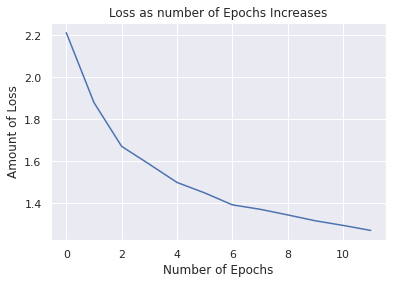

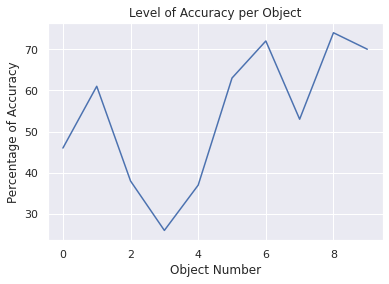

In [5]:
##Batch Size 4
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
##Loss Calculation
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
##Accuracy of 10000 images
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    #plt.plot(100 * correct / total)
    #plt.show()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

##Class Accuracy
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
##Plot for Loss    
loss_lst5 = [2.213, 1.88, 1.671, 1.586, 1.499, 1.449, 1.392, 1.371, 1.344, 1.316, 1.294, 1.27]
plt.plot(loss_lst5)
plt.xlabel('Number of Epochs')
plt.ylabel('Amount of Loss')
plt.title('Loss as number of Epochs Increases')
plt.show()

##Plot for Class Accuracy
class_accuracy5 = [46, 61, 38, 26, 37, 63, 72, 53, 74, 70]
plt.plot(class_accuracy5)
plt.xlabel("Object Number")
plt.ylabel("Percentage of Accuracy")
plt.title("Level of Accuracy per Object")
plt.show()

Files already downloaded and verified
Files already downloaded and verified
Finished Training
Accuracy of the network on the 10000 test images: 10 %
Accuracy of plane :  0 %
Accuracy of   car :  0 %
Accuracy of  bird :  0 %
Accuracy of   cat :  0 %
Accuracy of  deer :  0 %
Accuracy of   dog :  0 %
Accuracy of  frog :  0 %
Accuracy of horse :  0 %
Accuracy of  ship :  0 %
Accuracy of truck : 100 %


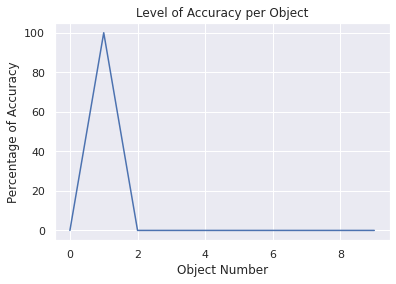

In [6]:
##Batch Size 1000
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1000,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
##Loss Calculation
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
##Accuracy of 10000 images
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    #plt.plot(100 * correct / total)
    #plt.show()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

##Class Accuracy
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
    
##Plot for Class Accuracy
class_accuracy6 = [0, 100, 0, 0, 0, 0, 0, 0, 0, 0]
plt.plot(class_accuracy6)
plt.xlabel("Object Number")
plt.ylabel("Percentage of Accuracy")
plt.title("Level of Accuracy per Object")
plt.show()

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 5772740124222733823592754103451648.000
[1,  4000] loss: 19.620
[1,  6000] loss: 18.522
[1,  8000] loss: 18.163
[1, 10000] loss: 18.764
[1, 12000] loss: 19.910
[2,  2000] loss: 18.808
[2,  4000] loss: 19.139
[2,  6000] loss: 19.491
[2,  8000] loss: 19.146
[2, 10000] loss: 19.151
[2, 12000] loss: 18.364
Finished Training
Accuracy of the network on the 10000 test images: 10 %
Accuracy of plane :  0 %
Accuracy of   car :  0 %
Accuracy of  bird :  0 %
Accuracy of   cat :  0 %
Accuracy of  deer :  0 %
Accuracy of   dog :  0 %
Accuracy of  frog :  0 %
Accuracy of horse : 100 %
Accuracy of  ship :  0 %
Accuracy of truck :  0 %


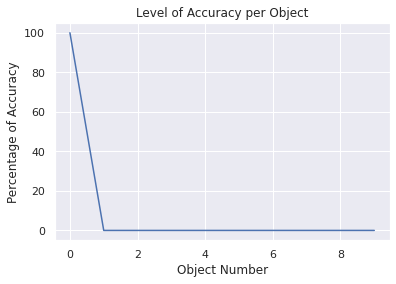

In [7]:
#6 Use different learning rates such as  10, 0.1, 0.01, and 0.0001
##Learning rate 10
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
##Loss calculation
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=10, momentum=0.9)
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
##Accuracy of 10000 images
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    #plt.plot(100 * correct / total)
    #plt.show()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

##Class Accuracy
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
    
##Plot for Class Accuracy
class_accuracy7 = [100, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.plot(class_accuracy7)
plt.xlabel("Object Number")
plt.ylabel("Percentage of Accuracy")
plt.title("Level of Accuracy per Object")
plt.show()

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.360
[1,  4000] loss: 2.358
[1,  6000] loss: 2.357
[1,  8000] loss: 2.357
[1, 10000] loss: 2.362
[1, 12000] loss: 2.359
[2,  2000] loss: 2.360
[2,  4000] loss: 2.360
[2,  6000] loss: 2.359
[2,  8000] loss: 2.360
[2, 10000] loss: 2.357
[2, 12000] loss: 2.358
Finished Training
Accuracy of the network on the 10000 test images: 10 %
Accuracy of plane :  0 %
Accuracy of   car :  0 %
Accuracy of  bird :  0 %
Accuracy of   cat : 100 %
Accuracy of  deer :  0 %
Accuracy of   dog :  0 %
Accuracy of  frog :  0 %
Accuracy of horse :  0 %
Accuracy of  ship :  0 %
Accuracy of truck :  0 %


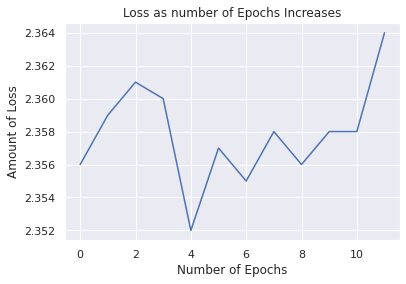

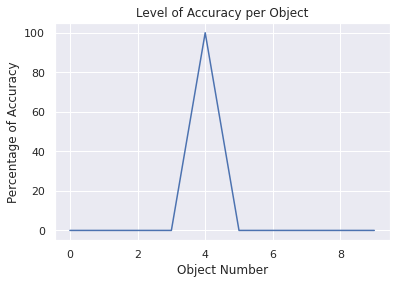

In [9]:
##Learning rate 0.1
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
##Loss Calculation
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
##Accuracy on 10000 images
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    #plt.plot(100 * correct / total)
    #plt.show()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

##Class Accuracy
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
##Plot for Loss    
loss_lst6 = [2.356, 2.359, 2.361, 2.36, 2.352, 2.357, 2.355, 2.358, 2.356, 2.358, 2.358, 2.364]
plt.plot(loss_lst6)
plt.xlabel('Number of Epochs')
plt.ylabel('Amount of Loss')
plt.title('Loss as number of Epochs Increases')
plt.show()

##Plot for Class Accuracy
class_accuracy8 = [0, 0, 0, 0, 100, 0, 0, 0, 0, 0]
plt.plot(class_accuracy8)
plt.xlabel("Object Number")
plt.ylabel("Percentage of Accuracy")
plt.title("Level of Accuracy per Object")
plt.show()

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.119
[1,  4000] loss: 1.991
[1,  6000] loss: 1.968
[1,  8000] loss: 1.978
[1, 10000] loss: 1.960
[1, 12000] loss: 1.952
[2,  2000] loss: 1.936
[2,  4000] loss: 1.936
[2,  6000] loss: 1.954
[2,  8000] loss: 1.986
[2, 10000] loss: 1.972
[2, 12000] loss: 1.997
Finished Training
Accuracy of the network on the 10000 test images: 27 %
Accuracy of plane : 18 %
Accuracy of   car : 49 %
Accuracy of  bird : 21 %
Accuracy of   cat :  2 %
Accuracy of  deer :  0 %
Accuracy of   dog : 21 %
Accuracy of  frog : 69 %
Accuracy of horse : 18 %
Accuracy of  ship : 46 %
Accuracy of truck : 30 %


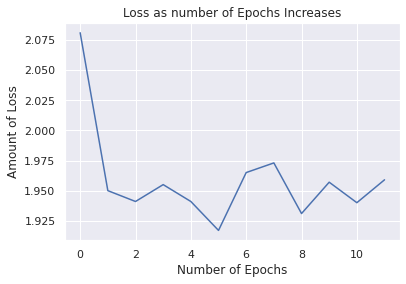

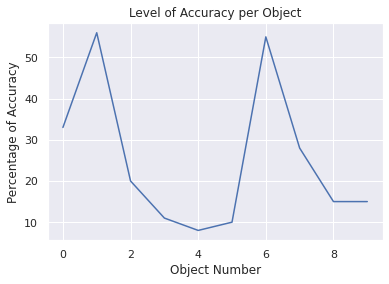

In [10]:
##Learning rate 0.01
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
##Loss Calculation
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
##Accuracy of 10000 images
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    #plt.plot(100 * correct / total)
    #plt.show()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

#Class Accuracy
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
#Plot for Loss   
loss_lst7 = [2.081, 1.95, 1.941, 1.955, 1.941, 1.917, 1.965, 1.973, 1.931, 1.957, 1.94, 1.959]
plt.plot(loss_lst7)
plt.xlabel('Number of Epochs')
plt.ylabel('Amount of Loss')
plt.title('Loss as number of Epochs Increases')
plt.show()

##Plot for Class Accuracy
class_accuracy9 = [33, 56, 20, 11, 8, 10, 55, 28, 15, 15]
plt.plot(class_accuracy9)
plt.xlabel("Object Number")
plt.ylabel("Percentage of Accuracy")
plt.title("Level of Accuracy per Object")
plt.show()

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.304
[1,  4000] loss: 2.301
[1,  6000] loss: 2.300
[1,  8000] loss: 2.296
[1, 10000] loss: 2.289
[1, 12000] loss: 2.263
[2,  2000] loss: 2.168
[2,  4000] loss: 2.122
[2,  6000] loss: 2.079
[2,  8000] loss: 2.022
[2, 10000] loss: 1.945
[2, 12000] loss: 1.882
Finished Training
Accuracy of the network on the 10000 test images: 33 %
Accuracy of plane : 54 %
Accuracy of   car : 32 %
Accuracy of  bird : 12 %
Accuracy of   cat :  1 %
Accuracy of  deer : 12 %
Accuracy of   dog : 33 %
Accuracy of  frog : 55 %
Accuracy of horse : 50 %
Accuracy of  ship : 26 %
Accuracy of truck : 52 %


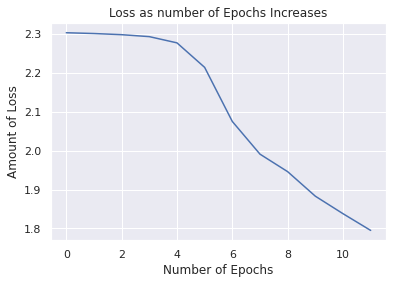

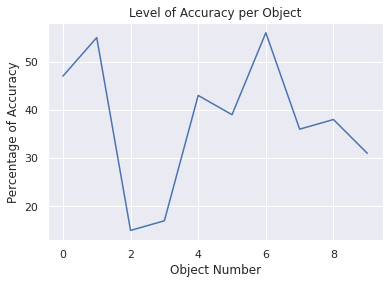

In [11]:
##Learning rate 0.0001
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
##Loss Calculation
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
##Accuracy of 10000 images
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    #plt.plot(100 * correct / total)
    #plt.show()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

##Class Accuracy
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
#Plot for Loss    
loss_lst8 = [2.303, 2.301, 2.298, 2.293, 2.277, 2.214, 2.075, 1.991, 1.946, 1.883, 1.838, 1.795]
plt.plot(loss_lst8)
plt.xlabel('Number of Epochs')
plt.ylabel('Amount of Loss')
plt.title('Loss as number of Epochs Increases')
plt.show()

##Plot for Class Accuracy
class_accuracy10 = [47, 55, 15, 17, 43, 39, 56, 36, 38, 31]
plt.plot(class_accuracy10)
plt.xlabel("Object Number")
plt.ylabel("Percentage of Accuracy")
plt.title("Level of Accuracy per Object")
plt.show()

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.220
[1,  4000] loss: 2.040
[1,  6000] loss: 1.944
[1,  8000] loss: 1.881
[1, 10000] loss: 1.861
[1, 12000] loss: 1.848
[2,  2000] loss: 1.802
[2,  4000] loss: 1.776
[2,  6000] loss: 1.778
[2,  8000] loss: 1.757
[2, 10000] loss: 1.733
[2, 12000] loss: 1.732
Finished Training
Accuracy of the network on the 10000 test images: 37 %
Accuracy of plane : 37 %
Accuracy of   car : 54 %
Accuracy of  bird : 14 %
Accuracy of   cat : 13 %
Accuracy of  deer : 38 %
Accuracy of   dog : 41 %
Accuracy of  frog : 58 %
Accuracy of horse : 46 %
Accuracy of  ship : 36 %
Accuracy of truck : 45 %


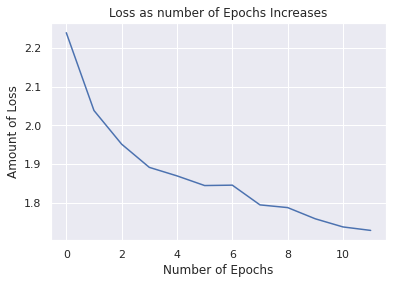

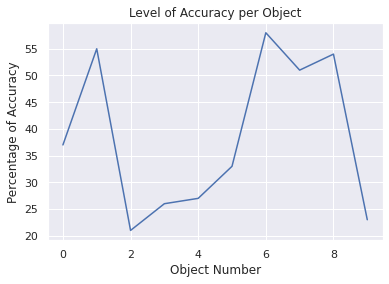

In [12]:
#Question 7 Add data agumentation to avoid overfitting
import argparse
transform = transforms.Compose(
    [transforms.RandomResizedCrop(32),
     transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
##Loss Calculation
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
##Accuracy on 10000 images
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    #plt.plot(100 * correct / total)
    #plt.show()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

##Class Accuracy
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
##Plot for Loss    
loss_lst9 = [2.239, 2.038, 1.951, 1.891, 1.869, 1.844, 1.845, 1.794, 1.787, 1.758, 1.737, 1.728]
plt.plot(loss_lst9)
plt.xlabel('Number of Epochs')
plt.ylabel('Amount of Loss')
plt.title('Loss as number of Epochs Increases')
plt.show()

##Plot for Class Accuracy
class_accuracy11 = [37, 55, 21, 26, 27, 33, 58, 51, 54, 23]
plt.plot(class_accuracy11)
plt.xlabel("Object Number")
plt.ylabel("Percentage of Accuracy")
plt.title("Level of Accuracy per Object")
plt.show()